## Business Understanding
The objective of this project is to predict house prices based on various real estate attributes in the dataset. We'll approach this problem using both linear regression and logistic regression models.

- Linear regression: Predict the continuous target variable "Y house price of unit area."
- Logistic regression: Convert the target variable to binary (above or below the average price) and build a binary classifier.

In [11]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
real_estate_valuation = fetch_ucirepo(id=477) 
  
# data (as pandas dataframes) 
X = real_estate_valuation.data.features 
y = real_estate_valuation.data.targets 
  
# metadata 
real_estate_valuation.metadata
  




{'uci_id': 477,
 'name': 'Real Estate Valuation',
 'repository_url': 'https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set',
 'data_url': 'https://archive.ics.uci.edu/static/public/477/data.csv',
 'abstract': 'The real estate valuation is a regression problem. The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. ',
 'area': 'Business',
 'tasks': ['Regression'],
 'characteristics': ['Multivariate'],
 'num_instances': 414,
 'num_features': 6,
 'feature_types': ['Integer', 'Real'],
 'demographics': [],
 'target_col': ['Y house price of unit area'],
 'index_col': ['No'],
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2018,
 'last_updated': 'Mon Feb 26 2024',
 'dataset_doi': '10.24432/C5J30W',
 'creators': ['I-Cheng Yeh'],
 'intro_paper': {'title': 'Building real estate valuation models with comparative approach through case-based reasoning',
  'authors': 'I. Yeh, Tzu-K

In [23]:
print(real_estate_valuation.metadata.additional_info.variable_info)

The inputs are as follows
X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
X2=the house age (unit: year)
X3=the distance to the nearest MRT station (unit: meter)
X4=the number of convenience stores in the living circle on foot (integer)
X5=the geographic coordinate, latitude. (unit: degree)
X6=the geographic coordinate, longitude. (unit: degree)

The output is as follow
Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)



## Data Understanding
The dataset contains multiple features including X1 transaction date, X2 house age, X3 distance to the nearest MRT station, X4 number of convenience stores, and X5 latitude/longitude.

A heatmap has been drawn to explore the correlations between features.

In [27]:
y 

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target


# Split for linear regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Binarize target for logistic regression
y_binary = (y > y.mean()).astype(int)
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_binary, test_size=0.3, random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

# Linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

# Logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train_bin, y_train_bin)
y_pred_log = log_reg.predict(X_test_bin)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
from sklearn.metrics import mean_squared_error, accuracy_score

# Evaluation for linear regression
mse = mean_squared_error(y_test, y_pred_lin)
print(f"Linear Regression MSE: {mse:.2f}")

# Evaluation for logistic regression
accuracy = accuracy_score(y_test_bin, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

# Feature importance (coefficients)
print("Linear Regression Coefficients:", lin_reg.coef_)
print("Logistic Regression Coefficients:", log_reg.coef_)

Linear Regression MSE: 73.57
Logistic Regression Accuracy: 0.78
Linear Regression Coefficients: [[ 1.65121984 -2.76093494 -6.40443563  3.2054653   2.9892929  -0.78771855]]
Logistic Regression Coefficients: [[ 0.00998541 -0.04500777 -0.00237362  0.1858874   0.26318069 -0.2014259 ]]


## Evaluation
- **Linear Regression**: The mean squared error (MSE) for the linear regression model is evaluated.
- **Logistic Regression**: The binary classification accuracy is measured for the logistic regression model.

Feature importance is determined by the coefficients from both models.

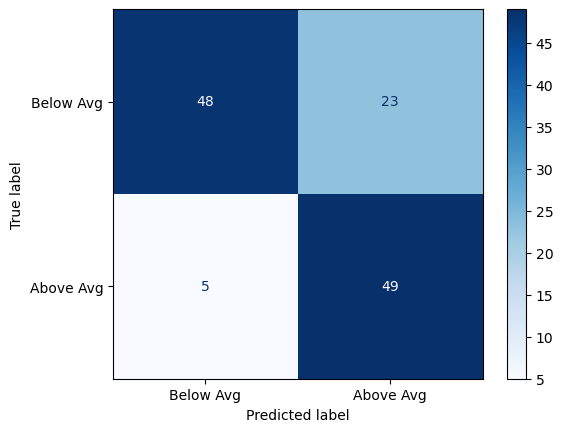

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test_bin, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Below Avg", "Above Avg"])
disp.plot(cmap=plt.cm.Blues) 
plt.show()

## Deployment
- laitettu githubiin
